In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd 
%matplotlib inline
sns.set(style='darkgrid')

In [3]:
df= pd.read_csv('merged.csv')

In [88]:
def integizer(string):
    for i in string:
        if i == '':
            return None
        else:
            return int(i)

def dolcomma(col):
    return pd.to_numeric(col.map(lambda x: x.replace(',', '').replace('$','')), downcast='integer')

def floatizer(string):
    for i in string:
        if i == '':
            return None
        else:
            continue
    return float(string)

In [90]:
#Cleaning up monetary columns and converting to integer
df['Assessment Improvement Improved']=dolcomma(df['Assessment Land'])
df['Most Recent Sale Price Improved'] =dolcomma(df['Most Recent Sale Price'])
df['Square Footage Improved'] = dolcomma(df['Square Footage'])
df['Improvement Value Improved']= dolcomma(df['Improvement Value'])
df['Assessment Total Improved']= dolcomma(df['Assessment Total'])
df['Land Value Improved']=dolcomma(df['Land Value'])
df['Assessment Land Improved']=dolcomma(df['Assessment Land'])
df['Total Appraisal Value Improved']=dolcomma(df['Total Appraisal Value'])

In [6]:
#Cleaning up certain date columns
df['Most Recent Sale Date Improved']=pd.to_datetime(df['Most Recent Sale Date'])
df['Sale Date Improved']=pd.to_datetime(df['Sale Date'])

In [75]:
#Converting 'Land Area' column to clean float
df['Land Area Acres'] = df['Land Area'].map(lambda x: x.replace(' ','').replace('Acres', '')).map(lambda x: float(x))

In [94]:
df['Land Value Improved'] = pd.to_numeric(df['Land Value Improved'], errors='coerce', downcast= 'integer')

df['Most Recent Sale Price Improved'].head()

0    435000
1    434900
2    345000
3    345000
4    155000
Name: Most Recent Sale Price Improved, dtype: int32

In [132]:
df['Land Value Improved'].head()

0    80000.0
1    80000.0
2    80000.0
3    80000.0
4    83200.0
Name: Land Value Improved, dtype: float64

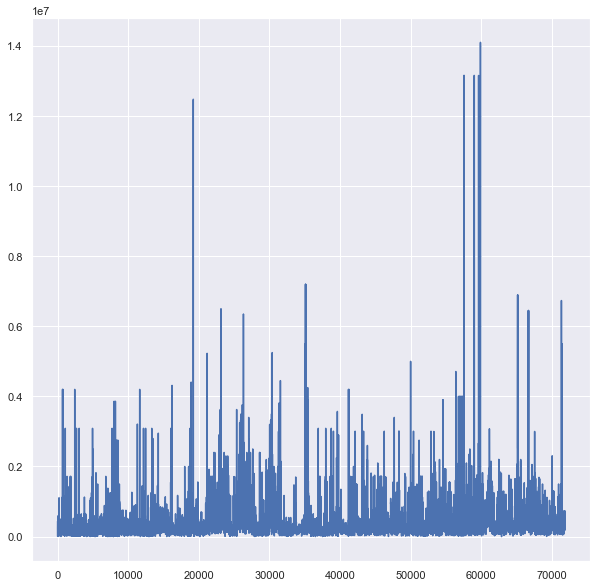

In [19]:
from pandas import Series
plt.figure(figsize=(10,10))
Series(df['Sale Price']).plot()

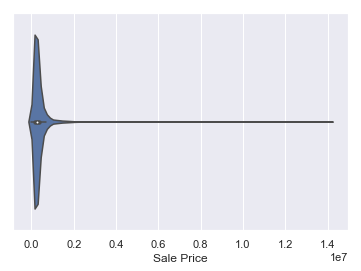

In [76]:
sns.violinplot(df['Sale Price'])

In [103]:
#Many neighborhoods only have 1 or 2 observations. We need to delete neighborhoods with 3 or less observations.
df['Neighborhood'].value_counts()
#.gt() = 'greater than'
s=df.Neighborhood.value_counts().gt(3)
df.loc[df.Neighborhood.isin(s[s].index)].shape
#Removes 124 observations from original dataframe.

(71696, 57)

In [105]:
df['']

71820

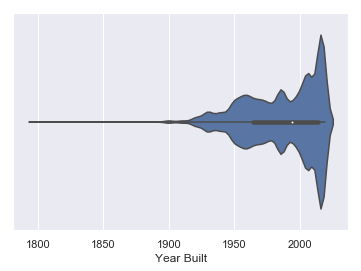

In [69]:
sns.violinplot(df['Year Built'])

In [64]:
#pd.plotting.scatter_matrix(df[['Beds','Bath', 'BuildingArea','Landsize']], alpha = 0.3,figsize = (12,8), diagonal = 'kde');

In [95]:
type(df['Story Height'])
#Need to convert this to numeric. Split-level = 1.5, 1.75 story= 1.5
df['Story Height Improved'] = df['Story Height'].astype(str).map(lambda x: x.replace('STY', '').replace('STORY','').replace(' ', '').replace('TWO', '2').replace('ONE', '1'))
df['Story Height Improved']=df['Story Height Improved'].map(lambda x: x.replace('THREE', '3').replace('SPLIT-LEVEL','1.5').replace('BI-LEVEL', '2')).replace('1.75','1.5')
df['Story Height Improved']=df['Story Height Improved'].map(lambda x: float(x))

print(df['Story Height Improved'].head(40))

0     2.0
1     1.5
2     1.5
3     1.5
4     1.0
5     1.0
6     NaN
7     1.0
8     2.0
9     1.0
10    2.0
11    2.0
12    1.0
13    NaN
14    1.0
15    1.0
16    1.0
17    1.0
18    1.5
19    2.0
20    1.0
21    1.0
22    1.5
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
30    1.0
31    1.0
32    1.0
33    2.0
34    2.0
35    2.0
36    2.0
37    2.0
38    2.0
39    1.5
Name: Story Height Improved, dtype: float64


In [77]:
len(df['Neighborhood'].unique())

830

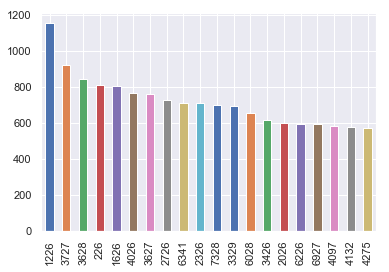

In [121]:
df.Neighborhood.value_counts()[:20].plot('bar')
#Need to remove neighborhoods with 3 or less parcels

In [114]:
#I'm going to clean up the classifications here, combine similar values
#Rural = Ag/Res = Res/Ag = Res/Forest = Farm/Agr = FRM
df['Assessment Classification'] = df['Assessment Classification'].replace('FOREST/RES', 'RURAL').replace('RES/AGR', 'RURAL').replace('FARM/AGR', 'RURAL').replace('FRST/FRM', 'RURAL')
df['Assessment Classification'] = df['Assessment Classification'].replace('AG/RES', 'RURAL').replace('RES/FOREST', 'RURAL').replace('FRM','RURAL')
df['Assessment Classification']= df['Assessment Classification'].replace('')
print(df['Assessment Classification'].value_counts())

RES        69245
COM         2435
EXE           46
RURAL         38
RES/COM       16
CA/OS         15
COM/RES       12
AO             9
EXE/COM        1
OSAP           1
EXE VAC        1
GOV            1
Name: Assessment Classification, dtype: int64


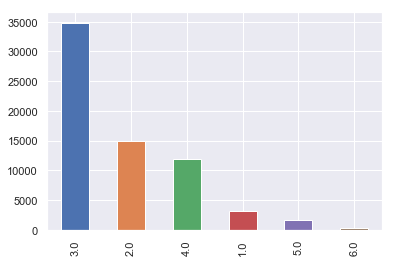

In [122]:
df.Beds.value_counts()[:6].plot('bar')

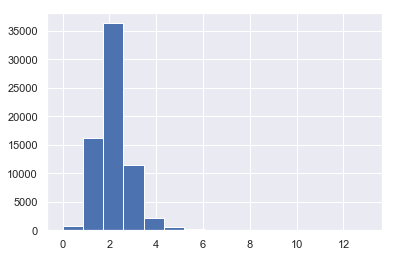

In [131]:
df.Baths.hist(bins=15)